## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  17.146956   151.637611  0.964735  3.454803  1.553070
1  43.530364   631.506908  0.586061  4.576803  1.654007
2  10.294445   329.728145  0.173333  6.818789  1.499842
3  16.803614   919.790578  0.468419  6.837365  1.541479
4  33.079848  1713.325117  0.406787  7.962859  1.456639


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9282689	total: 69.3ms	remaining: 1m 9s
1:	learn: 0.9211408	total: 69.8ms	remaining: 34.8s
2:	learn: 0.9116080	total: 70.2ms	remaining: 23.3s
3:	learn: 0.9023022	total: 70.8ms	remaining: 17.6s
4:	learn: 0.8936627	total: 71.3ms	remaining: 14.2s
5:	learn: 0.8846643	total: 71.8ms	remaining: 11.9s
6:	learn: 0.8766148	total: 72.2ms	remaining: 10.2s
7:	learn: 0.8666222	total: 72.7ms	remaining: 9.01s
8:	learn: 0.8587154	total: 73ms	remaining: 8.03s
9:	learn: 0.8496826	total: 73.5ms	remaining: 7.27s
10:	learn: 0.8425386	total: 73.8ms	remaining: 6.64s
11:	learn: 0.8344382	total: 74.4ms	remaining: 6.13s
12:	learn: 0.8251749	total: 74.9ms	remaining: 5.69s
13:	learn: 0.8172501	total: 75.3ms	remaining: 5.31s
14:	learn: 0.8092073	total: 75.8ms	remaining: 4.98s
15:	learn: 0.8023242	total: 76.2ms	remaining: 4.68s
16:	learn: 0.7947755	total: 76.7ms	remaining: 4.43s
17:	learn: 0.7873152	total: 77.3ms	remaining: 4.22s
18:	learn: 0.7806497	total: 77.6ms	remaining: 

90:	learn: 0.4432803	total: 109ms	remaining: 1.09s
91:	learn: 0.4403965	total: 109ms	remaining: 1.08s
92:	learn: 0.4375241	total: 110ms	remaining: 1.07s
93:	learn: 0.4347804	total: 110ms	remaining: 1.06s
94:	learn: 0.4313075	total: 111ms	remaining: 1.05s
95:	learn: 0.4287917	total: 111ms	remaining: 1.05s
96:	learn: 0.4260662	total: 112ms	remaining: 1.04s
97:	learn: 0.4234715	total: 112ms	remaining: 1.03s
98:	learn: 0.4210319	total: 113ms	remaining: 1.02s
99:	learn: 0.4179753	total: 113ms	remaining: 1.01s
100:	learn: 0.4152125	total: 113ms	remaining: 1.01s
101:	learn: 0.4129216	total: 114ms	remaining: 1s
102:	learn: 0.4105552	total: 114ms	remaining: 993ms
103:	learn: 0.4080912	total: 115ms	remaining: 987ms
104:	learn: 0.4057023	total: 115ms	remaining: 980ms
105:	learn: 0.4030635	total: 116ms	remaining: 974ms
106:	learn: 0.4007646	total: 116ms	remaining: 968ms
107:	learn: 0.3989020	total: 116ms	remaining: 961ms
108:	learn: 0.3962137	total: 117ms	remaining: 953ms
109:	learn: 0.3934751	tot

266:	learn: 0.2001979	total: 187ms	remaining: 513ms
267:	learn: 0.1993403	total: 187ms	remaining: 512ms
268:	learn: 0.1988373	total: 188ms	remaining: 510ms
269:	learn: 0.1983701	total: 188ms	remaining: 509ms
270:	learn: 0.1977469	total: 189ms	remaining: 508ms
271:	learn: 0.1970689	total: 189ms	remaining: 506ms
272:	learn: 0.1965454	total: 189ms	remaining: 505ms
273:	learn: 0.1962277	total: 190ms	remaining: 503ms
274:	learn: 0.1954405	total: 190ms	remaining: 502ms
275:	learn: 0.1946008	total: 191ms	remaining: 500ms
276:	learn: 0.1943062	total: 191ms	remaining: 499ms
277:	learn: 0.1938156	total: 191ms	remaining: 497ms
278:	learn: 0.1928557	total: 192ms	remaining: 495ms
279:	learn: 0.1924711	total: 192ms	remaining: 494ms
280:	learn: 0.1921097	total: 192ms	remaining: 493ms
281:	learn: 0.1917669	total: 193ms	remaining: 491ms
282:	learn: 0.1913680	total: 193ms	remaining: 490ms
283:	learn: 0.1906781	total: 194ms	remaining: 488ms
284:	learn: 0.1896957	total: 194ms	remaining: 487ms
285:	learn: 

499:	learn: 0.0958681	total: 291ms	remaining: 291ms
500:	learn: 0.0956516	total: 292ms	remaining: 291ms
501:	learn: 0.0955917	total: 292ms	remaining: 290ms
502:	learn: 0.0953959	total: 293ms	remaining: 289ms
503:	learn: 0.0951848	total: 293ms	remaining: 289ms
504:	learn: 0.0951257	total: 294ms	remaining: 288ms
505:	learn: 0.0948764	total: 294ms	remaining: 287ms
506:	learn: 0.0945689	total: 294ms	remaining: 286ms
507:	learn: 0.0943632	total: 295ms	remaining: 285ms
508:	learn: 0.0941221	total: 295ms	remaining: 285ms
509:	learn: 0.0939346	total: 295ms	remaining: 284ms
510:	learn: 0.0937480	total: 296ms	remaining: 283ms
511:	learn: 0.0936734	total: 296ms	remaining: 282ms
512:	learn: 0.0931952	total: 297ms	remaining: 282ms
513:	learn: 0.0929963	total: 297ms	remaining: 281ms
514:	learn: 0.0928149	total: 297ms	remaining: 280ms
515:	learn: 0.0927582	total: 298ms	remaining: 279ms
516:	learn: 0.0925254	total: 298ms	remaining: 279ms
517:	learn: 0.0923322	total: 299ms	remaining: 278ms
518:	learn: 

674:	learn: 0.0634376	total: 369ms	remaining: 178ms
675:	learn: 0.0633567	total: 370ms	remaining: 177ms
676:	learn: 0.0632400	total: 370ms	remaining: 177ms
677:	learn: 0.0631180	total: 371ms	remaining: 176ms
678:	learn: 0.0629330	total: 371ms	remaining: 175ms
679:	learn: 0.0628538	total: 371ms	remaining: 175ms
680:	learn: 0.0627352	total: 372ms	remaining: 174ms
681:	learn: 0.0625383	total: 372ms	remaining: 174ms
682:	learn: 0.0623331	total: 373ms	remaining: 173ms
683:	learn: 0.0621523	total: 373ms	remaining: 172ms
684:	learn: 0.0619814	total: 374ms	remaining: 172ms
685:	learn: 0.0617803	total: 374ms	remaining: 171ms
686:	learn: 0.0616056	total: 375ms	remaining: 171ms
687:	learn: 0.0614929	total: 375ms	remaining: 170ms
688:	learn: 0.0614008	total: 376ms	remaining: 170ms
689:	learn: 0.0613098	total: 376ms	remaining: 169ms
690:	learn: 0.0612011	total: 377ms	remaining: 169ms
691:	learn: 0.0610022	total: 377ms	remaining: 168ms
692:	learn: 0.0608390	total: 378ms	remaining: 167ms
693:	learn: 

910:	learn: 0.0383063	total: 474ms	remaining: 46.3ms
911:	learn: 0.0382646	total: 474ms	remaining: 45.8ms
912:	learn: 0.0381427	total: 475ms	remaining: 45.2ms
913:	learn: 0.0380331	total: 475ms	remaining: 44.7ms
914:	learn: 0.0379917	total: 475ms	remaining: 44.1ms
915:	learn: 0.0378890	total: 476ms	remaining: 43.6ms
916:	learn: 0.0378481	total: 476ms	remaining: 43.1ms
917:	learn: 0.0378205	total: 476ms	remaining: 42.5ms
918:	learn: 0.0377450	total: 477ms	remaining: 42ms
919:	learn: 0.0376958	total: 477ms	remaining: 41.5ms
920:	learn: 0.0375896	total: 477ms	remaining: 41ms
921:	learn: 0.0374399	total: 478ms	remaining: 40.4ms
922:	learn: 0.0373750	total: 478ms	remaining: 39.9ms
923:	learn: 0.0373085	total: 479ms	remaining: 39.4ms
924:	learn: 0.0372829	total: 479ms	remaining: 38.9ms
925:	learn: 0.0371202	total: 480ms	remaining: 38.4ms
926:	learn: 0.0370121	total: 480ms	remaining: 37.8ms
927:	learn: 0.0368970	total: 481ms	remaining: 37.3ms
928:	learn: 0.0367995	total: 481ms	remaining: 36.8

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

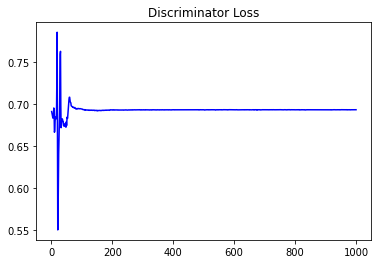

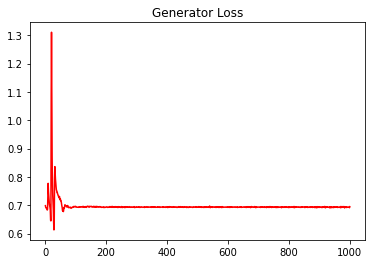

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.2086879770693318


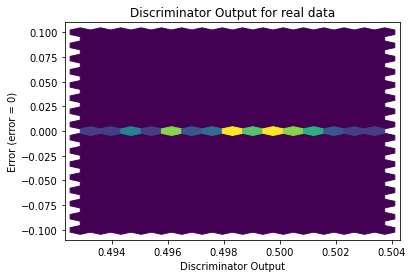

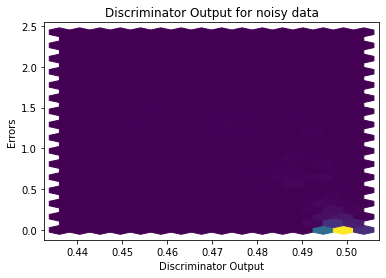

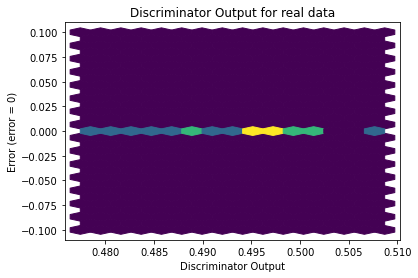

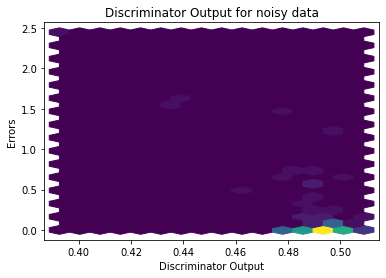

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


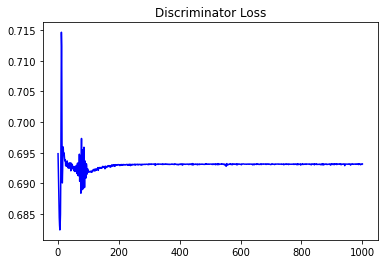

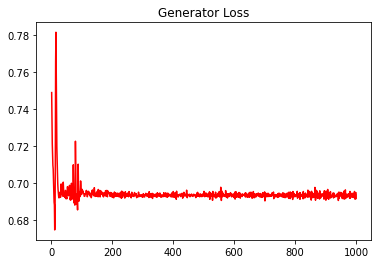

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.2217501072169367


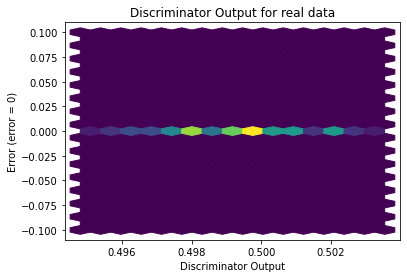

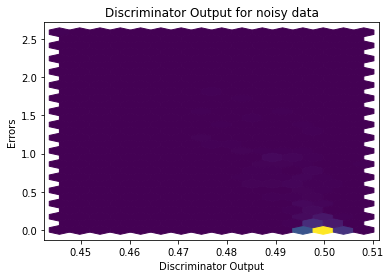

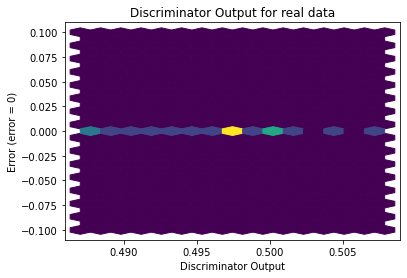

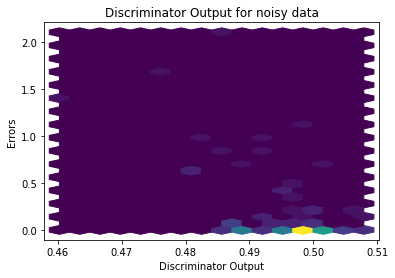

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7661]], requires_grad=True)
